Empty DataFrame
Columns: [timeStamp, total, avai, percent, used, free]
Index: []
[             timeStamp       total       avai percent        used       free
0  2019-04-28 11:23:30  4055.117MB  476.184MB   88.3%  3578.934MB  476.184MB
1  2019-04-28 11:23:31  4055.117MB   477.57MB   88.2%  3577.547MB   477.57MB
2  2019-04-28 11:23:32  4055.117MB  482.852MB   88.1%  3572.266MB  482.852MB
3  2019-04-28 11:23:33  4055.117MB  482.863MB   88.1%  3572.254MB  482.863MB
4  2019-04-28 11:23:34  4055.117MB  482.953MB   88.1%  3572.164MB  482.953MB]
[             timeStamp       total       avai percent        used       free
0  2019-04-28 11:23:30  4055.117MB  476.184MB   88.3%  3578.934MB  476.184MB
1  2019-04-28 11:23:31  4055.117MB   477.57MB   88.2%  3577.547MB   477.57MB
2  2019-04-28 11:23:32  4055.117MB  482.852MB   88.1%  3572.266MB  482.852MB
3  2019-04-28 11:23:33  4055.117MB  482.863MB   88.1%  3572.254MB  482.863MB
4  2019-04-28 11:23:34  4055.117MB  482.953MB   88.1%  3572.164MB  48

KeyboardInterrupt: 

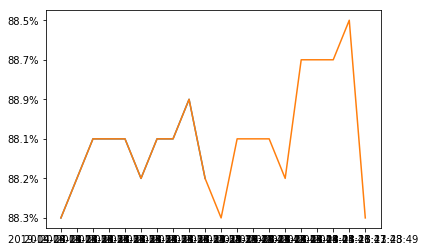

In [95]:
import psutil
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt



tempSeriesList = []
finalDFList = []
finalDF = pd.DataFrame(data=None,columns=["timeStamp","total","avai","percent","used","free"])
print(finalDF)
count = 0

cpudic = {}
cpudic["count"] = psutil.cpu_count()
cpudic["freq"] = psutil.cpu_freq()
cpudic["percentage"] = psutil.cpu_percent()

memo = {}
memo["total"] = str(psutil.virtual_memory().total/1024/1024) + "MB"
memo["avai"] = str(psutil.virtual_memory().available/1024/1024) + "MB"
memo["percent"] = str(psutil.virtual_memory().percent) + "%"
memo["used"] = str(psutil.virtual_memory().used/1024/1024) + "MB"
memo["free"] = str(psutil.virtual_memory().free/1024/1024) + "MB"
memoryList = []
for value in memo.values():
    memoryList.append(value)
#     print(value)
# columns=['total','available','percent','used','free']


def record_memo():
    global tempSeriesList,finalDFList,count,finalDF
    while True:
        memo = {}
        memo["total"] = str(round(psutil.virtual_memory().total/1024/1024,3)) + "MB"
        memo["avai"] = str(round(psutil.virtual_memory().available/1024/1024,3)) + "MB"
        memo["percent"] = str(psutil.virtual_memory().percent) + "%"
        memo["used"] = str(round(psutil.virtual_memory().used/1024/1024,3)) + "MB"
        memo["free"] = str(round(psutil.virtual_memory().free/1024/1024,3)) + "MB"
        timeStamp = str(datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
        memoryList = []
        memoryList.append(timeStamp)
        for value in memo.values():
            memoryList.append(value)
        ser = pd.Series(memoryList)
        tempSeriesList.append(ser)
        # 每秒记录一次数据，数据为series，每5秒生成一个dataframe
        if len(tempSeriesList) >= 5:
            tempDF = pd.DataFrame(tempSeriesList)
            tempDF.columns=["timeStamp","total","avai","percent","used","free"]
#             print(tempDF)
            tempSeriesList = []
            finalDFList.append(tempDF)
            print(finalDFList)
            count += 1 
        time.sleep(1)
        if count == 2: #每次DFList添加了新的数据后，count就会加1，也就是说每5秒count加1.当这里count为10时，则会向最终输出的DF进行合并。
            finalDF = finalDF.append(finalDFList,ignore_index=True)
            print(finalDF)
            finalDFList = []
            finalDF.to_csv("aaa.csv")
            count = 0
            pc = finalDF["percent"]
            print(pc)
            tttime = finalDF["timeStamp"]
            plt.plot(tttime,pc)

record_memo()

# ,columns=["timeStamp","total","avai","percent","used","free"])
# ser = pd.Series(memoryList)

# print(df)
# print(cpudic)
# print(memo)




# pd.DataFrame()
